Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
from sklearn.datasets import load_boston

In [211]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [212]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [213]:
y = pd.DataFrame(boston.target, columns=['price'])

In [214]:
print(X.shape, y.shape)

(506, 13) (506, 1)


In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler = StandardScaler()

In [219]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [220]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [221]:
from sklearn.manifold import TSNE

In [222]:
model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = model.fit_transform(X_train_scaled)

In [223]:
X_train_tsne.shape

(404, 2)

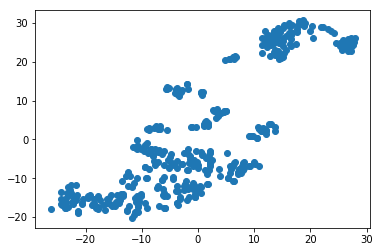

In [224]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [254]:
X_train_tsne.shape

(404, 2)

In [255]:
Kmean = KMeans(n_clusters=2, max_iter=100, random_state=42)

центроиды:
[[-14.244046   -14.966708  ]
 [ 17.371805    25.432062  ]
 [  0.35576582  -1.7581235 ]]



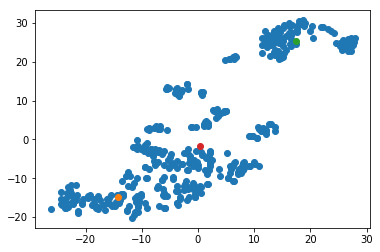

In [286]:
from sklearn.cluster import KMeans
# вызываем модели по указанным параметрам
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
# обучаем ее на, обратите внимание, именно на X_train_tsne (не на X_train_scaled - там другая размерность)
model.fit(X_train_tsne)
# смторим, как центроиды у нас получились
centers = model.cluster_centers_
print(f'центроиды:\n{centers}\n')
# и теперь визуализируем
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.scatter(centers[0,0], centers[0,1])
plt.scatter(centers[1,0], centers[1,1])
plt.scatter(centers[2,0], centers[2,1])
plt.show()